# 講談社「Pythonではじめるベイズ機械学習入門」第3章 回帰モデル

## 3.4 ロジスティック回帰モデル

In [1]:
using Distributions
using Plots
using Turing
using StatsPlots
using StatsFuns
using RDatasets
using StatsBase
using DataFrames

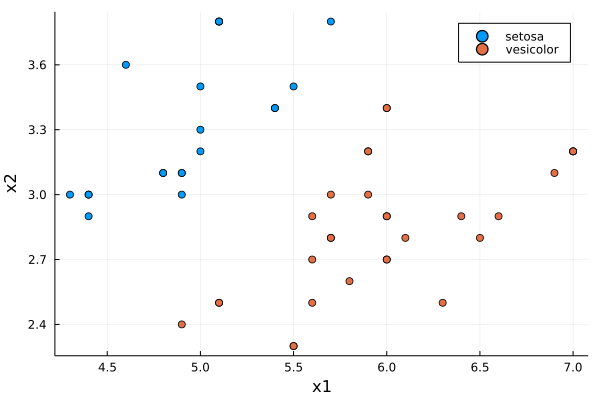

In [2]:
iris_dataframe = dataset("datasets", "iris")
iris_matrix = Matrix(iris_dataframe)
iris = hcat(iris_matrix[:, 1:2], iris_matrix[:, 5])

setosa = iris[iris[:, 3] .== "setosa", :]
versicolor = iris[iris[:, 3] .== "versicolor", :]
iris_2species = vcat(setosa, versicolor)

N = 50
_train_data = iris_2species[rand(1:size(iris_2species, 1), N), :]
train_data = hcat(_train_data, zeros(N))
for n in 1:N
    if train_data[n, 3] == "setosa"
        train_data[n, 4] = 0
    else
        train_data[n, 4] = 1
    end
end
train_data_add_bias = hcat(train_data, ones(N))

x_data_set = train_data_add_bias[train_data_add_bias[:, 4] .== 0, :]
x_data_ves = train_data_add_bias[train_data_add_bias[:, 4] .== 1, :]

scatter(x_data_set[:, 1], x_data_set[:, 2], xlabel="x1", ylabel="x2", label="setosa")
scatter!(x_data_ves[:, 1], x_data_ves[:, 2], label="vesicolor")

In [3]:
train_data_add_bias

50×5 Matrix{Any}:
 5.7  2.8  "versicolor"  1  1.0
 4.3  3.0  "setosa"      0  1.0
 4.4  3.0  "setosa"      0  1.0
 5.9  3.0  "versicolor"  1  1.0
 5.6  2.5  "versicolor"  1  1.0
 6.0  3.4  "versicolor"  1  1.0
 6.1  2.8  "versicolor"  1  1.0
 5.9  3.2  "versicolor"  1  1.0
 4.8  3.1  "setosa"      0  1.0
 5.6  2.7  "versicolor"  1  1.0
 6.0  2.7  "versicolor"  1  1.0
 6.0  2.7  "versicolor"  1  1.0
 4.8  3.1  "setosa"      0  1.0
 ⋮                          
 7.0  3.2  "versicolor"  1  1.0
 4.9  2.4  "versicolor"  1  1.0
 5.0  3.2  "setosa"      0  1.0
 5.7  2.8  "versicolor"  1  1.0
 5.7  3.8  "setosa"      0  1.0
 4.6  3.6  "setosa"      0  1.0
 7.0  3.2  "versicolor"  1  1.0
 4.9  3.0  "setosa"      0  1.0
 5.6  2.9  "versicolor"  1  1.0
 4.9  3.1  "setosa"      0  1.0
 5.5  2.3  "versicolor"  1  1.0
 5.1  3.8  "setosa"      0  1.0

In [4]:
@model function logistic_regression(x, y;
        N = size(x, 1)
    )
    w1 ~ Normal(0.0, 1.0)
    w2 ~ Normal(0.0, 1.0)
    w3 ~ Normal(0.0, 1.0)
    for n in 1:N
        θ = logistic(w1 * x[n, 1] + w2 * x[n, 2] + w3 * x[n, 3])
        y[n] ~ Bernoulli(θ)
    end
    return y
end

_x_train = train_data_add_bias[:, 1:2]
bias = train_data_add_bias[:, 5]
x_train = hcat(_x_train, bias)
y_train = train_data_add_bias[:, 4]
model = logistic_regression(x_train, y_train)

DynamicPPL.Model{var"###evaluator#310", (:x, :y), Tuple{Matrix{Any}, Vector{Any}}, (), DynamicPPL.ModelGen{var"###generator#311", (:x, :y), (), Tuple{}}}(var"##evaluator#310", (x = Any[5.7 2.8 1.0; 4.3 3.0 1.0; … ; 5.5 2.3 1.0; 5.1 3.8 1.0], y = Any[1, 0, 0, 1, 1, 1, 1, 1, 0, 1  …  0, 1, 0, 0, 1, 0, 1, 0, 1, 0]), DynamicPPL.ModelGen{var"###generator#311", (:x, :y), (), Tuple{}}(var"##generator#311", NamedTuple()))

In [5]:
chain = sample(model, NUTS(), 3000);

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
┌ Info: Found initial step size
│   ϵ = 0.2
└ @ Turing.Inference /Users/akifumiabe/.julia/packages/Turing/GMBTf/src/inference/hmc.jl:629
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC /Users/akifumiabe/.julia/packages/AdvancedHMC/MIxdK/src/hamiltonian.jl:47
Sampling:   5%|██                                       |  ETA: 0:00:20┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true,

Object of type Chains, with data of type 2000×15×1 Array{Float64, 3}

Iterations        = 1:2000
Thinning interval = 1
Chains            = 1
Samples per chain = 2000
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth
parameters        = w1, w2, w3

2-element Vector{ChainDataFrame}

Summary Statistics
  parameters     mean     std  naive_se    mcse        ess   r_hat
  ──────────  ───────  ──────  ────────  ──────  ─────────  ──────
          w1   1.7958  0.3493    0.0078  0.0104   900.9716  1.0002
          w2  -2.9179  0.5952    0.0133  0.0167   914.0238  1.0012
          w3  -0.4345  0.9519    0.0213  0.0226  1167.7414  0.9996

Quantiles
  parameters     2.5%    25.0%    50.0%    75.0%    97.5%
  ──────────  ───────  ───────  ───────  ───────  ───────
          w1   1.1341   1.5557   1.8031   2.0296   2.4736
          w2  -4.0984  -3

display(chain) = nothing
describe(chain) = 2-element Vector{ChainDataFrame}

Summary Statistics
  parameters     mean     std  naive_se    mcse        ess   r_hat
  ──────────  ───────  ──────  ────────  ──────  ─────────  ──────
          w1   1.7958  0.3493    0.0078  0.0104   900.9716  1.0002
          w2  -2.9179  0.5952    0.0133  0.0167   914.0238  1.0012
          w3  -0.4345  0.9519    0.0213  0.0226  1167.7414  0.9996

Quantiles
  parameters     2.5%    25.0%    50.0%    75.0%    97.5%
  ──────────  ───────  ───────  ───────  ───────  ───────
          w1   1.1341   1.5557   1.8031   2.0296   2.4736
          w2  -4.0984  -3.3288  -2.9175  -2.5082  -1.8020
          w3  -2.2563  -1.0680  -0.4531   0.1995   1.4389



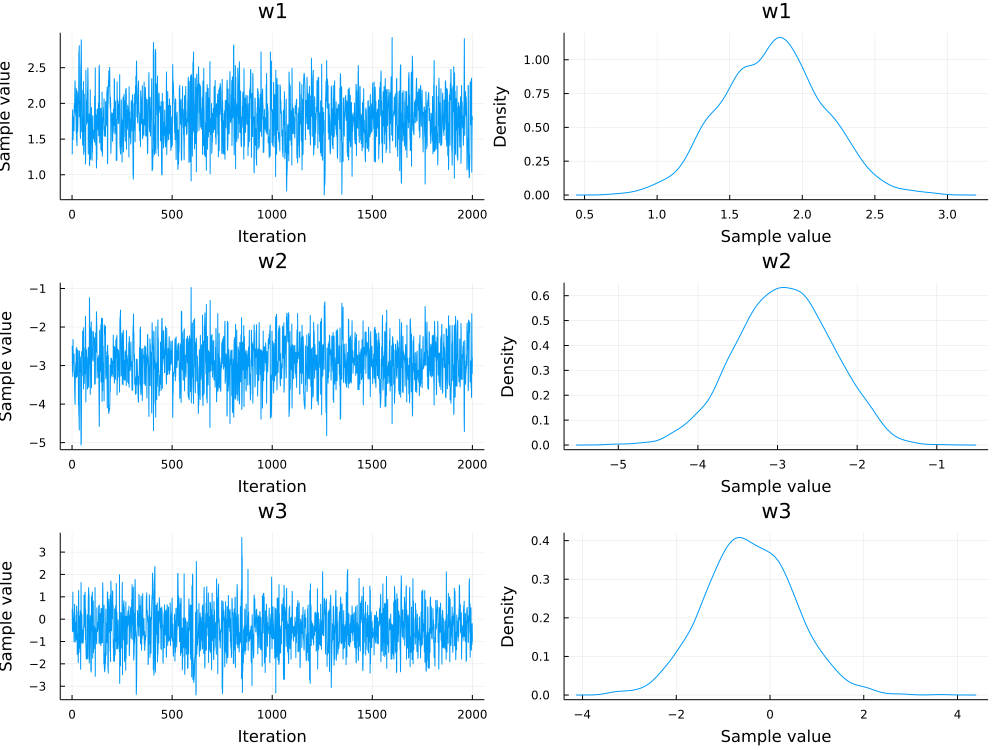

In [6]:
function visualize_mcmc_results(chain)
    @show display(chain)
    @show describe(chain)
    p = plot(chain)    
    return p
end

p = visualize_mcmc_results(chain)
p

In [7]:
params = get_params(chain)
@show keys(params)

@show _, i = findmax(params[:lp])
@show params[:w1][i]
@show params[:w2][i]
@show params[:w3][i];

keys(params) = (:w3, :hamiltonian_energy, :n_steps, :numerical_error, :max_hamiltonian_energy_error, :hamiltonian_energy_error, :is_accept, :w1, :tree_depth, :log_density, :step_size, :acceptance_rate, :w2, :lp, :nom_step_size)
(_, i) = findmax(params[:lp]) = (-19.378699821331253, CartesianIndex(1406, 1))
(params[:w1])[i] = 1.7465769234690485
(params[:w2])[i] = -2.80289965533559
(params[:w3])[i] = -0.47679215001524655


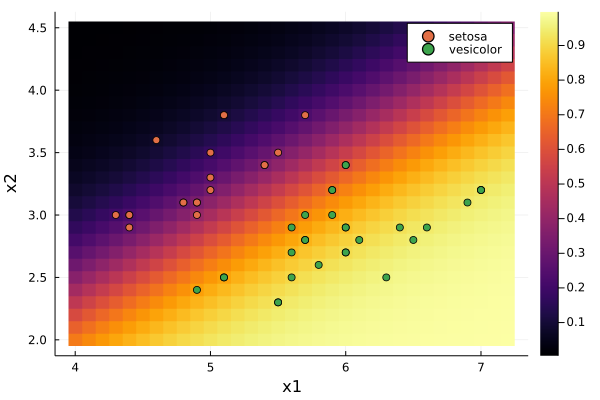

In [8]:
x1 = 4.0:0.1:7.2
x2 = 2.0:0.1:4.5
x1_grid = repeat(reshape(x1, 1, :), length(x2), 1)
x2_grid = repeat(x2, 1, length(x1))
bias = ones(size(x1_grid))

w1 = params[:w1]
w2 = params[:w2]
w3 = params[:w3]

N, L = size(x1_grid)
D = length(w1)
ypred = zeros(N, L, D)
for d in 1:D
    for l in 1:L
        for n in 1:N
            ypred[n, l, d] = logistic(w1[d] * x1_grid[n, l] + w2[d] * x2_grid[n, l] + w3[d] * bias[n, l])
        end
    end
end

_ypred_mean = zeros(N, L)
for d in 1:D
    _ypred_mean += ypred[:, :, d]
end
ypred_mean = _ypred_mean / D

heatmap(x1, x2, ypred_mean, xlabel="x1", ylabel="x2")
scatter!(x_data_set[:, 1], x_data_set[:, 2], label="setosa")
scatter!(x_data_ves[:, 1], x_data_ves[:, 2], label="vesicolor")